# Exploring the environment

In [113]:
!pwd

/kaggle/working


In [114]:
!ls

__notebook_source__.ipynb


In [115]:
base_dir = '../'

In [116]:
!ls {base_dir}

config	input  lib  working


In [117]:
!ls {base_dir+'/input'}

README.md  project_description.md  titanic_data.csv  visuals.py


### Load and inspect data

In [118]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import os   ## <<========
from IPython.display import display # Allows the use of display() for DataFrames

## Import supplementary visualizations code visuals.py
## Change directory so that we can import visuals.py
os.chdir('../input/') ## <<========
import visuals as vs

## Change directory back to where we have the notebook
os.chdir('../working/') ## <<========

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = '../input/titanic_data.csv' ## <<========
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check types

In [8]:
type(full_data)

pandas.core.frame.DataFrame

### Check documentation

In [9]:
?full_data

In [10]:
??full_data

### Metadata

In [11]:
full_data.shape

(891, 12)

In [12]:
full_data.size

10692

In [13]:
?full_data.size

### Column names

In [14]:
full_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
for col_name in full_data.columns:
    print(col_name,end=',')

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,

In [16]:
list(full_data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### Accessing a column by name

In [17]:
full_data.PassengerId

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
861    862
862    863
863    864
864    865
865    866
866    867
867    868
868    869
869    870
870    871
871    872
872    873
873    874
874    875
875    876
876    877
877    878
878    879
879    880
880    881
881    882
882    883
883    884
884    885
885    886
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [18]:
full_data['PassengerId']

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
861    862
862    863
863    864
864    865
865    866
866    867
867    868
868    869
869    870
870    871
871    872
872    873
873    874
874    875
875    876
876    877
877    878
878    879
879    880
880    881
881    882
882    883
883    884
884    885
885    886
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

### What's the type of a column?

In [19]:
type(full_data.PassengerId)

pandas.core.series.Series

### Accessing rows 

In [20]:
full_data[0]

KeyError: 0

In [ ]:
full_data.iloc[0]

In [21]:
?full_data.iloc

In [22]:
full_data.iloc[0, 2:5]

Pclass                          3
Name      Braund, Mr. Owen Harris
Sex                          male
Name: 0, dtype: object

### What's the type of a row?

In [23]:
type(full_data.iloc[0])

pandas.core.series.Series

### Access a single element and get its type.

In [24]:
type(full_data.iloc[0,0])

numpy.int64

In [25]:
full_data.iloc[0,0].dtype

dtype('int64')

### Take out two columns

In [26]:
sub_data1 = full_data[['Survived', 'Sex']]

In [27]:
sub_data1.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [28]:
sub_data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Grouping and aggregation

In [29]:
grouped1 = sub_data1.groupby('Sex')

In [30]:
type(grouped1)

pandas.core.groupby.groupby.DataFrameGroupBy

In [31]:
grouped1.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

In [32]:
grouped1.size()

Sex
female    314
male      577
dtype: int64

### Get a 'grouped column' out of a 'grouped data frame'

In [33]:
grouped1.Survived

In [34]:
grouped1.Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [35]:
grouped1.Survived.agg(np.mean)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Look at the travel class column

In [36]:
full_data['Pclass'].dtype

dtype('int64')

In [37]:
sub_data2 = full_data[['Survived','Pclass']]

In [38]:
grouped2 = sub_data2.groupby('Pclass')

In [39]:
grouped2.Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

### Look at `age` column

In [40]:
full_data['Age'].dtype

dtype('float64')

In [41]:
full_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [42]:
sub_data3 = full_data[['Survived', 'Age']]

In [43]:
sub_data4 = sub_data3.dropna()

In [44]:
sorted4 = sub_data4.sort_values('Age')

In [45]:
sorted4

,Survived,Age
803,1,0.42
755,1,0.67
644,1,0.75
469,1,0.75
78,1,0.83
831,1,0.83
305,1,0.92
827,1,1.00
381,1,1.00
164,0,1.00


In [46]:
sorted4['Cumulative Survivals'] = np.cumsum(sorted4.Survived) / len(sorted4) * 100

In [47]:
sorted4

,Survived,Age,Cumulative Survivals
803,1,0.42,0.140056
755,1,0.67,0.280112
644,1,0.75,0.420168
469,1,0.75,0.560224
78,1,0.83,0.700280
831,1,0.83,0.840336
305,1,0.92,0.980392
827,1,1.00,1.120448
381,1,1.00,1.260504
164,0,1.00,1.260504


In [48]:
import matplotlib.pyplot as plt

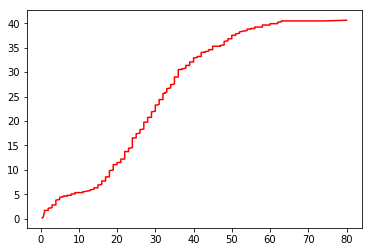

In [49]:
plt.plot(list(sorted4['Age']), list(sorted4['Cumulative Survivals']),'r-')
plt.show()

### Convert age to bins

In [50]:
sorted4['Age Group'] = pd.cut(sorted4['Age'],8)

In [51]:
sorted4

,Survived,Age,Cumulative Survivals,Age Group
803,1,0.42,0.140056,"(0.34, 10.368]"
755,1,0.67,0.280112,"(0.34, 10.368]"
644,1,0.75,0.420168,"(0.34, 10.368]"
469,1,0.75,0.560224,"(0.34, 10.368]"
78,1,0.83,0.700280,"(0.34, 10.368]"
831,1,0.83,0.840336,"(0.34, 10.368]"
305,1,0.92,0.980392,"(0.34, 10.368]"
827,1,1.00,1.120448,"(0.34, 10.368]"
381,1,1.00,1.260504,"(0.34, 10.368]"
164,0,1.00,1.260504,"(0.34, 10.368]"


In [52]:
grouped4 = sorted4.groupby('Age Group')

In [53]:
grouped4.Survived.value_counts()

Age Group         Survived
(0.34, 10.368]    1            38
                  0            26
(10.368, 20.315]  0            71
                  1            44
(20.315, 30.263]  0           146
                  1            84
(30.263, 40.21]   0            86
                  1            69
(40.21, 50.158]   0            53
                  1            33
(50.158, 60.105]  0            25
                  1            17
(60.105, 70.052]  0            13
                  1             4
(70.052, 80.0]    0             4
                  1             1
Name: Survived, dtype: int64

### Look at combined effects of gender and passenger class on survival

In [54]:
sub_data5 = full_data[['Survived','Pclass', 'Sex']]

In [55]:
sub_data5

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
5,0,3,male
6,0,1,male
7,0,3,male
8,1,3,female
9,1,2,female


In [56]:
grouped5 = sub_data5.groupby(['Pclass', 'Sex'])

In [57]:
grouped5.Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [58]:
grouped5.Survived.agg(np.mean)

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

More on grouping and aggregation:
https://pandas.pydata.org/pandas-docs/stable/groupby.html

# PROJECT CODE

---

# Machine Learning Engineer Nanodegree
## Introduction and Foundations
## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [59]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [60]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive.

In [61]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1

* Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [62]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


**Answer:** *Replace this text with the prediction accuracy you found above.*

### Vectorized implementation

In [63]:
predictions = np.zeros(len(data))
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `visuals.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

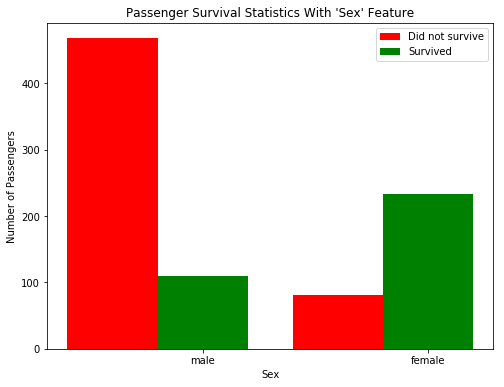

In [64]:
vs.survival_stats(data, outcomes, 'Sex')

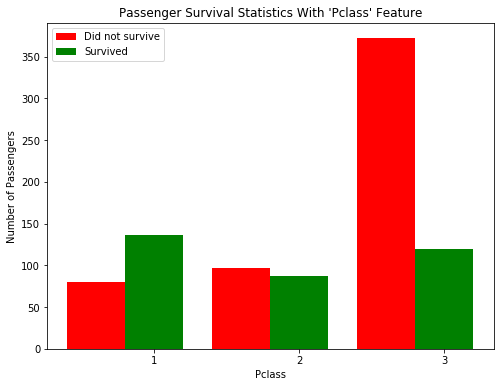

In [65]:
vs.survival_stats(data, outcomes, 'Pclass')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can access the values of each feature for a passenger like a dictionary. For example, `passenger['Sex']` is the sex of the passenger.

In [66]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        predictions.append(passenger['Sex'] == 'female')
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2

* How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [67]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


**Answer**: *Replace this text with the prediction accuracy you found above.*

** Vectorized implementation **

In [68]:
predictions = (data.Sex == 'female')

In [69]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

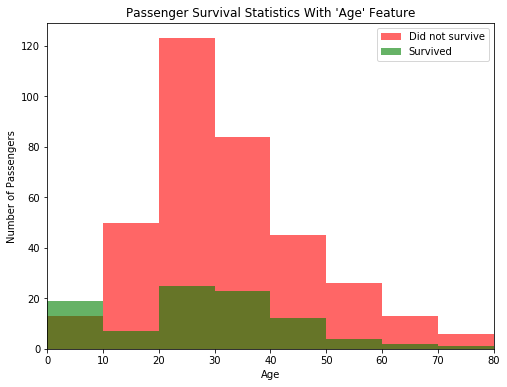

In [70]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_1`.

In [71]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        pass
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3

* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived? 

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [72]:
print(accuracy_score(outcomes, predictions))

Number of predictions does not match number of outcomes!


In [73]:
cond1 = (data['Sex'] == 'female')
cond2 = (data['Sex'] == 'male') & (data['Age'] < 10)
predictions =  cond1 | cond2

print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


**Answer**: *Replace this text with the prediction accuracy you found above.*

***
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.

Use the `survival_stats` function below to to examine various survival statistics.  
**Hint:** To use mulitple filter conditions, put each condition in the list passed as the last argument. Example: `["Sex == 'male'", "Age < 18"]`

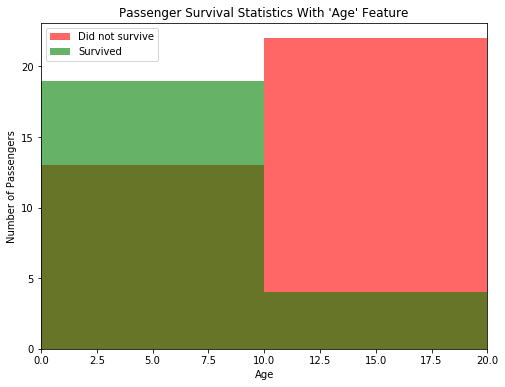

In [74]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.  
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_2`.

In [75]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        pass
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4

* Describe the steps you took to implement the final prediction model so that it got **an accuracy of at least 80%**. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?

**Hint:** Run the code cell below to see the accuracy of your predictions.

In [76]:
print(accuracy_score(outcomes, predictions))

Number of predictions does not match number of outcomes!


**Answer**: *Replace this text with your answer to the question above.*

# Conclusion

After several iterations of exploring and conditioning on the data, you have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic. The technique applied in this project is a manual implementation of a simple machine learning model, the *decision tree*. A decision tree splits a set of data into smaller and smaller groups (called *nodes*), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many models that come from *supervised learning*. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like `'Survived'`, or a numerical, continuous value like predicting the price of a house.

### Question 5
*Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.*  

**Answer**: *Replace this text with your answer to the question above.*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Behind the scenes
https://github.com/udacity/machine-learning/blob/master/projects/titanic_survival_exploration/visuals.py

# Onto Models (Algorithms)

---

## Probabilistic, Tree and Regression algorithms (models).

### Naive Baye's
The values in each column in `data` have some effect on the outcome. For example, the probability of a female passenger surviving is higher than a male passenger. How can this be formalized into an algorithm? 

- How to compute probabilities for real valued columns like `age`?
- What's so naive about Naive Baye's ?
- What's so Baye's about Naive Baye's ?

### Decision Tree
Refining predictions with nested if-then-else's.

### Regression 
Assume that predictions are a linear combination of the column values.

## Prepare Data

In [77]:
data.shape

(891, 11)

In [78]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
data.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
sub_data = full_data[['Pclass','Sex','Age','Survived']].dropna()

In [81]:
sub_data.shape

(714, 4)

In [82]:
sub_data.head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [83]:
for col in sub_data.columns:
    print(col,':',sub_data[col].dtype)

Pclass : int64
Sex : object
Age : float64
Survived : int64


In [84]:
sub_data.Sex = (sub_data.Sex == 'female').astype(np.int)

In [85]:
sub_data.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


In [86]:
sub_features, sub_outcomes = sub_data.iloc[:, :-1], sub_data.iloc[:, -1]

In [87]:
sub_features.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [88]:
sub_outcomes.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Scale Data

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
sub_features = scaler.fit_transform(sub_features)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [92]:
sub_features[:5]

array([[1.        , 0.        , 0.27117366],
       [0.        , 1.        , 0.4722292 ],
       [1.        , 1.        , 0.32143755],
       [0.        , 1.        , 0.43453129],
       [1.        , 0.        , 0.43453129]])

### Split Data

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
train_features, test_features, train_outcomes, test_outcomes = train_test_split(sub_features, sub_outcomes, test_size=0.20, random_state=0xDEAD)

In [95]:
print(train_features.shape, train_outcomes.shape)

(571, 3) (571,)


In [96]:
print(test_features.shape, test_outcomes.shape)

(143, 3) (143,)


## Naive Baye's Model

### Fit model

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
clf_gnb = GaussianNB()

In [99]:
clf_gnb.fit(train_features, train_outcomes)

GaussianNB(priors=None, var_smoothing=1e-09)

### Evaluate model

In [100]:
clf_gnb.score(train_features, train_outcomes)

0.7915936952714536

In [101]:
clf_gnb.score(test_features, test_outcomes)

0.7482517482517482

In [102]:
?clf_gnb.score

In [103]:
from sklearn.metrics import f1_score

In [104]:
train_outcomes.dtype

dtype('int64')

In [105]:
f1_score(clf_gnb.predict(train_features), train_outcomes)

0.7238979118329466

In [106]:
f1_score(clf_gnb.predict(test_features), test_outcomes)

0.7049180327868854

  ** The GNB model performs only as good as a trial-and-error approach we used in P0. How can we improve the performance :**
  
  - Do we need more data?
  - Do we need a more complex model?
  
  > This is the subject of P1 where we use learning curves to find if more data will help improve performance and then use model complexity plots to find the right model size. Note that the GNB model has very few parameters to tweak the model complexity.

## Decision Tree Model

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
clf_dtc = DecisionTreeClassifier(max_depth=3)

In [109]:
clf_dtc.fit(train_features, train_outcomes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
clf_dtc.score(train_features, train_outcomes)

0.8231173380035026

In [112]:
clf_dtc.score(test_features, test_outcomes)

0.7482517482517482

** The tree model performs much better than trial and error on the training set, however it fails to get a similar performance on the test set. What's going wrong?**

Fortunately tree models have lots of knobs that can be turned ( look at the parameters of `DecisionTreeClassifier()`) to bridge the gap between the training and test performance.  Try setting the `max_depth` parameter to a small value, for example `DecisionTreeClassifier(max_depth=3)` and look at the effect it has on train and test accuracy. 

## Final Notes
Look at the visuals.py files for P0 and P1 and try to understand how the backbone code works.

- **P0**: https://github.com/udacity/machine-learning/blob/master/projects/titanic_survival_exploration/visuals.py
- **P1**: https://github.com/udacity/machine-learning/blob/master/projects/boston_housing/visuals.py